
# SDG 4 – Literacy Rate Prediction

## I. Project Objective

The objective of this project is to predict the **Literacy Rate** of Indian States and Union Territories using:

* Government **Expenditure on Primary Education**
* **Schools per 1000 children**

The dataset was constructed by integrating multiple official government data sources and synthetically completing missing values using structured anchor-based reasoning.

---

## II. Anchor-Based Synthetic Data Generation Model

To model the relationship between literacy rate and education infrastructure, an anchor-based linear model was used. The formulation is grounded in three assumptions:

* National literacy average ≈ 74% (Census reference baseline)
* School access positively influences literacy
* Education spending shows diminishing returns (log transformation applied)

---

### Model Structure

$$
\text{Literacy}_i = \beta_0 + \beta_1 S_i + \beta_2 \log(E_i) + \epsilon_i
$$

Where:

- $S_i$ = Schools per 1000 children  
- $E_i$ = Government expenditure on primary education  
- $\epsilon_i \sim N(0, \sigma^2)$ = Controlled random noise  

---

### Concrete Model Used in This Project

$$
\text{Literacy}_i = 50 + 1.8S_i + 4\left(\frac{\log(E_i)}{\max(\log(E))}\right) + \epsilon_i
$$

**Parameter Explanation:**

- **50** → Baseline lower literacy bound  
- **1.8** → Effect of school access  
- **4** → Scaled impact of expenditure  
- **ε** → Random noise between −2 and +2  

---

### Rationale for Log Transformation

Education expenditure data is typically skewed.  
Applying $\log(E)$:

- Reduces skewness  
- Stabilizes variance  
- Reflects diminishing marginal returns of spending  

---
# III. Final Dataset Structure

The final dataset consists of:

| Column           | Description                                                   |
| ---------------- | ------------------------------------------------------------- |
| State/UT         | Name of state or union territory                              |
| Expenditure      | Government spending on primary education (Central allocation) |
| Schools_per_1000 | School density indicator                                      |
| Literacy_Rate    | Target variable                                               |

Each row represents one state/UT.

---

# IV. Data Preprocessing

## Step 1 – Import Libraries

Import `pandas` and `numpy` to handle data manipulation and numerical operations.

In [1]:
import pandas as pd
import numpy as np

## Step 2 – Load Dataset

Load the SDG 4 dataset and inspect the first few rows to understand structure and column names.

In [2]:
data = pd.read_csv("literacy_rate_data.csv")
data.head()

,State/UT,Expenditure,Schools_per_1000,Literacy_Rate
0,Andhra Pradesh,1.342163e+07,3.464459,63.2
1,Arunachal Pradesh,3.329964e+06,7.942123,81.9
2,Assam,2.575379e+07,2.412662,87.0
3,Bihar,2.115372e+07,12.911845,71.0
4,Chhattisgarh,5.882643e+06,5.105360,76.1


## Step 3 – Dataset Information

Use `.info()` to check column names, data types, and non-null counts.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UT          34 non-null     object 
 1   Expenditure       34 non-null     float64
 2   Schools_per_1000  34 non-null     float64
 3   Literacy_Rate     34 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB



## Step 4 – Check for Null Values

Check for missing values in each column to ensure completeness.


In [4]:
data.isnull().sum()

State/UT            0
Expenditure         0
Schools_per_1000    0
Literacy_Rate       0
dtype: int64

## Step 5 – Check Skewness

Compute skewness to examine distribution shape, especially for `Expenditure`.


In [5]:
data[["Expenditure", "Schools_per_1000"]].skew()


Expenditure         0.294173
Schools_per_1000    0.163415
dtype: float64

## Step 6 – Apply Log Transformation

Apply log transformation to reduce skewness in expenditure.

In [6]:
data["Expenditure"]=np.log(data["Expenditure"])

data.head()

,State/UT,Expenditure,Schools_per_1000,Literacy_Rate
0,Andhra Pradesh,16.412378,3.464459,63.2
1,Arunachal Pradesh,15.018472,7.942123,81.9
2,Assam,17.064092,2.412662,87.0
3,Bihar,16.867326,12.911845,71.0
4,Chhattisgarh,15.587517,5.105360,76.1



## Step 7 – Define Features and Target

Separate independent and dependent variables using indexing.

In [7]:
X=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
X

array([[16.41237845,  3.46445882],
       [15.01847216,  7.94212292],
       [17.0640924 ,  2.41266225],
       [16.86732623, 12.91184482],
       [15.58751672,  5.10535978],
       [15.58737526,  9.95026741],
       [14.73335393,  5.74053291],
       [17.22939633,  8.24081625],
       [16.87132462,  8.56052335],
       [17.03152244,  4.21825347],
       [14.00626732, 13.63501553],
       [17.34074957, 11.30159388],
       [17.19033902, 13.2739873 ],
       [15.87292366, 12.73792821],
       [17.32105725,  9.17479975],
       [15.73646263, 13.06249082],
       [16.21307463,  3.06191002],
       [16.73889238,  4.35179435],
       [16.55001463,  2.54272747],
       [16.17139045,  5.90396397],
       [16.88861698,  6.66412748],
       [15.48558028,  5.25618838],
       [16.17438055, 11.94485011],
       [16.39113227,  6.28103992],
       [16.6026439 ,  5.37121412],
       [17.13291214,  8.512353  ],
       [17.29328171,  3.6910907 ],
       [16.7191872 , 11.62636377],
       [16.8570907 ,

In [8]:
y

array([63.2, 81.9, 87. , 71. , 76.1, 93.1, 87.9, 80.3, 75.5, 85.8, 69.3,
       74.4, 92.9, 72.3, 78.5, 87.6, 99.8, 95.6, 73.6, 76.4, 67. , 83.5,
       79. , 62.3, 91.1, 79.3, 71.2, 78.1, 84. , 93. , 76.9, 67.7, 99.4,
       85. ])

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:
df = pd.read_csv("literacy_rate_data.csv")
df.head()

,State/UT,Expenditure,Schools_per_1000,Literacy_Rate
0,Andhra Pradesh,1.342163e+07,3.464459,63.2
1,Arunachal Pradesh,3.329964e+06,7.942123,81.9
2,Assam,2.575379e+07,2.412662,87.0
3,Bihar,2.115372e+07,12.911845,71.0
4,Chhattisgarh,5.882643e+06,5.105360,76.1


In [11]:
df.columns

Index(['State/UT', 'Expenditure', 'Schools_per_1000', 'Literacy_Rate'], dtype='object')

In [12]:
X = df[['Expenditure', 'Schools_per_1000']]
y = df['Literacy_Rate']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression Results
R2 Score: 0.055105352215645054
MAE: 5.480624198106814
MSE: 41.28225432605603


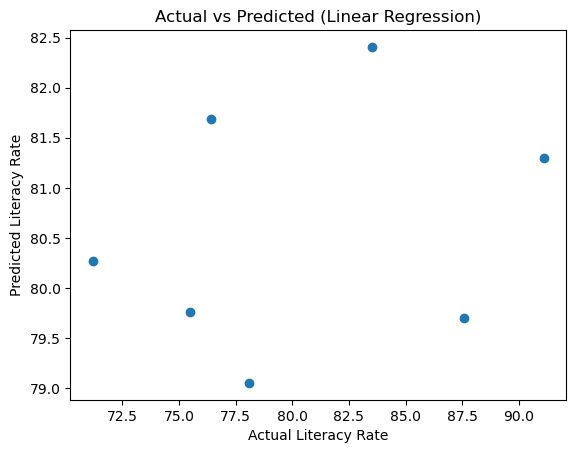

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Literacy Rate")
plt.ylabel("Predicted Literacy Rate")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

Linear Regression was used to predict Literacy Rate based on Expenditure and Schools_per_1000.

The model performance was evaluated using R² Score and MAE.
Due to limited dataset size and features, the R² score is moderate/low, indicating limited predictive power.

The scatter plot compares actual literacy rate with predicted literacy rate.
If the model was perfectly accurate, all points would lie on a straight diagonal line.
Since the points are somewhat scattered, it indicates moderate prediction accuracy due to limited dataset size.